# Polynomial Regression / GPUs Dataset Analysis

### Moore's law: Number of transistors in a dense integrated circuit doubles approximately every two years. 

# Table of Contents

* [1. Polynomial Regression Theory](#polynomial_regression_theory) <br>
   * [1.1. Types of linear regression](#types_of_regression) <br>
   * [1.2. Estimating the polynomial coefficients](#estimating_the_polynomial_coefficients) <br>
<br>
* [2. Importing dataset and data preprocessing](#importing_dataset_and_data_preprocessing) <br>
   * [2.1. Dataset import](#dataset_import) <br>
   * [2.2. Let's summarize the Dataset](#lets_summarize_the_dataset) <br>
   * [2.3. Data preprocessing](#data_preprocessing) <br>
<br>
* [3. Data visualisation](#data_visualisation) <br>
    * [3.1. GPU Memory vs Year of Release (Scatter Plot)](#gpu_memory_vs_year_of_release)

## 1. Polynomial Regression Theory
<a id="polynomial_regression_theory"></a>

### 1.1. Types of linear regression
<a id="types_of_regression"></a>

* <b>Simple linear regression</b>  - the very simplest case of a single scalar predictor variable $x$ and a single scalar response variable $\hat{y}$, where $\varepsilon$ is unobserved random error. This type of regression is described by following 
equation:<br>

$$\hat{y}=\beta_{0}+\beta_{1}x+\varepsilon$$

<br>

* <b>Multiple linear regression</b> (Multivariable linear regression) - in this model predictor variable $x$ is extended into vector predictor $\mathbf {X}$. Note, however, that in these cases the response variable $\hat{y}$ is still a scalar. 

$$\hat{y}=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}+\varepsilon$$

<br>

* <b>Polynomial linear regression</b> - this model is linear, because the regression function is linear in terms of the unknown parameters $\beta_{0}, \beta_{1}, ...$. Variables $x, x^{2}, ...$ are treated as being distinct independent variables in a multiple regression model.

$$\hat{y}=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{1}^{2}+...+\beta_{n}x_{1}^{n}+\varepsilon$$

### 1.2. Estimating the polynomial coefficients
<a id="estimating_the_polynomial_coefficients"></a>

The polynomial regression model: 

${\displaystyle \hat{y_{i}}\,=\,\beta _{0}+\beta _{1}x_{i}+\beta _{2}x_{i}^{2}+\cdots +\beta _{m}x_{i}^{m}+\varepsilon _{i}\ (i=1,2,\dots ,n)}$

can be expressed in matrix form as: 

$\displaystyle {\vec {y}}=\mathbf {X} {\vec {\beta }}+{\vec {\varepsilon }}$

Where:
* $\mathbf {X}$ - design matrix
* $\vec {y}$ -  response vector
* $\vec {\beta }$ - parameter vector
* $\vec {\varepsilon }$ -  vector of random errors

Then the model can be written as a system of linear equations:

$${\begin{bmatrix}y_{1}\\y_{2}\\y_{3}\\\vdots \\y_{n}\end{bmatrix}}={\begin{bmatrix}1&x_{1}&x_{1}^{2}&\dots &x_{1}^{m}\\1&x_{2}&x_{2}^{2}&\dots &x_{2}^{m}\\1&x_{3}&x_{3}^{2}&\dots &x_{3}^{m}\\\vdots &\vdots &\vdots &\ddots &\vdots \\1&x_{n}&x_{n}^{2}&\dots &x_{n}^{m}\end{bmatrix}}{\begin{bmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{m}\end{bmatrix}}+{\begin{bmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\varepsilon _{3}\\\vdots \\\varepsilon _{n}\end{bmatrix}}$$



## 2. Importing dataset and data preprocessing
<a id="importing_dataset_and_data_preprocessing"></a>

### 2.1. Dataset import
<a id="dataset_import"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Let's import dataset from csv file
dataset = pd.read_csv('../../00_Datasets/GPUs/All_GPUs.csv')

### 2.2. Let's try to summarize the Dataset
<a id="lets_summarize_the_dataset"></a>

In [18]:
dataset.head(3)

Architecture Best_Resolution Boost_Clock Core_Speed  DVI_Connection  \
0  Tesla G92b              NaN         NaN    738 MHz             2.0   
1     R600 XT       1366 x 768         NaN       \n-              2.0   
2    R600 PRO       1366 x 768         NaN       \n-              2.0   

  Dedicated Direct_X  DisplayPort_Connection  HDMI_Connection Integrated  \
0       Yes  DX 10.0                     NaN              0.0         No   
1       Yes    DX 10                     NaN              0.0         No   
2       Yes    DX 10                     NaN              0.0         No   

      ...      Release_Price Resolution_WxH SLI_Crossfire  Shader  TMUs  \
0     ...                NaN      2560x1600           Yes     4.0  64.0   
1     ...                NaN      2560x1600           Yes     4.0  16.0   
2     ...                NaN      2560x1600           Yes     4.0  16.0   

  Texture_Rate VGA_Connection Release_Year Release_Month      Release  
0  47 GTexel/s            0.0         2009             3  2009.250000  
1  12 GTexel/s            0.0         2007             5  2007.416667  
2  10 GTexel/s            0.0         2007            12  2008.000000  

[3 rows x 37 columns]

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3360 entries, 0 to 3405
Data columns (total 37 columns):
Architecture              3300 non-null object
Best_Resolution           2721 non-null object
Boost_Clock               1409 non-null object
Core_Speed                3360 non-null object
DVI_Connection            2610 non-null float64
Dedicated                 3346 non-null object
Direct_X                  3355 non-null object
DisplayPort_Connection    823 non-null float64
HDMI_Connection           2597 non-null float64
Integrated                3346 non-null object
L2_Cache                  3360 non-null object
Manufacturer              3360 non-null object
Max_Power                 2738 non-null object
Memory                    3360 non-null int32
Memory_Bandwidth          3241 non-null object
Memory_Bus                3300 non-null object
Memory_Speed              3257 non-null object
Memory_Type               3305 non-null object
Name                      3360 non-null object

<b> NOTE: </b> Right away we can see that there is lots of undefined values. Let's use "Missingno" package which is a most useful and convenient tool in visualising missing values in the dataset. There are only few columns that can by use as reliable source of information for our analysis. Most of columns are incomplete or in wrong format. We will perform data preprocessing to make some columns usefull in our analysis.

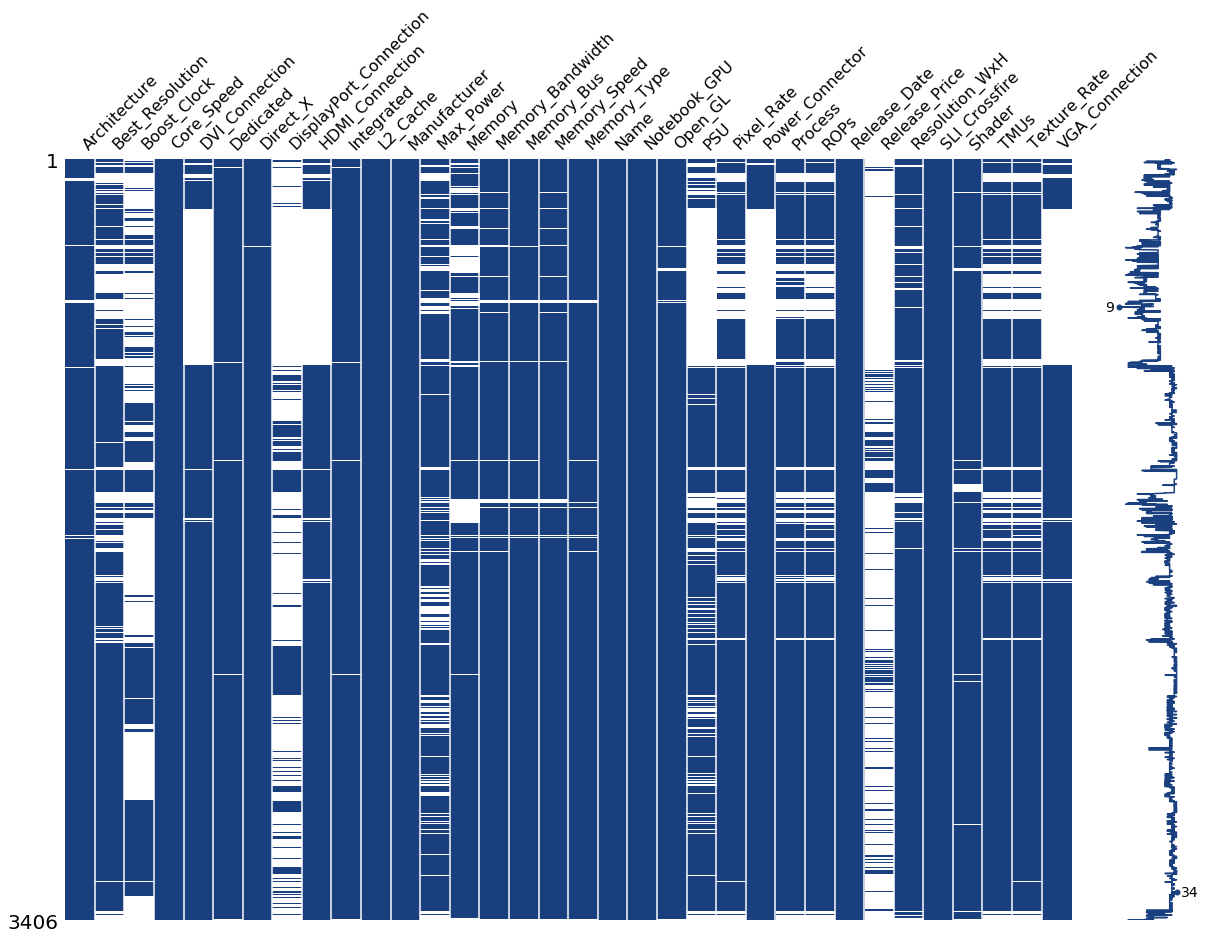

In [5]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=dataset, figsize=(20, 14), color=(0.1, 0.25, 0.5))

### 2.3. Data preprocessing
<a id="data_preprocessing"></a>

In [6]:
dataset['Release_Date']=dataset['Release_Date'].str[1:-1]
dataset=dataset[dataset['Release_Date'].str.len()==11]
dataset['Release_Date']=pd.to_datetime(dataset['Release_Date'], format='%d-%b-%Y')
dataset['Release_Year']=dataset['Release_Date'].dt.year
dataset['Release_Month']=dataset['Release_Date'].dt.month
dataset['Release']=dataset['Release_Year'] + dataset['Release_Month']/12

In [7]:
dataset['Memory'] = dataset['Memory'].str[:-3].fillna(0).astype(int)

## 3. Data visualisation
<a id="data_visualisation"></a>

### 3.1. GPU Memory vs Year of Release (Scatter Plot)
<a id="gpu_memory_vs_year_of_release"></a>

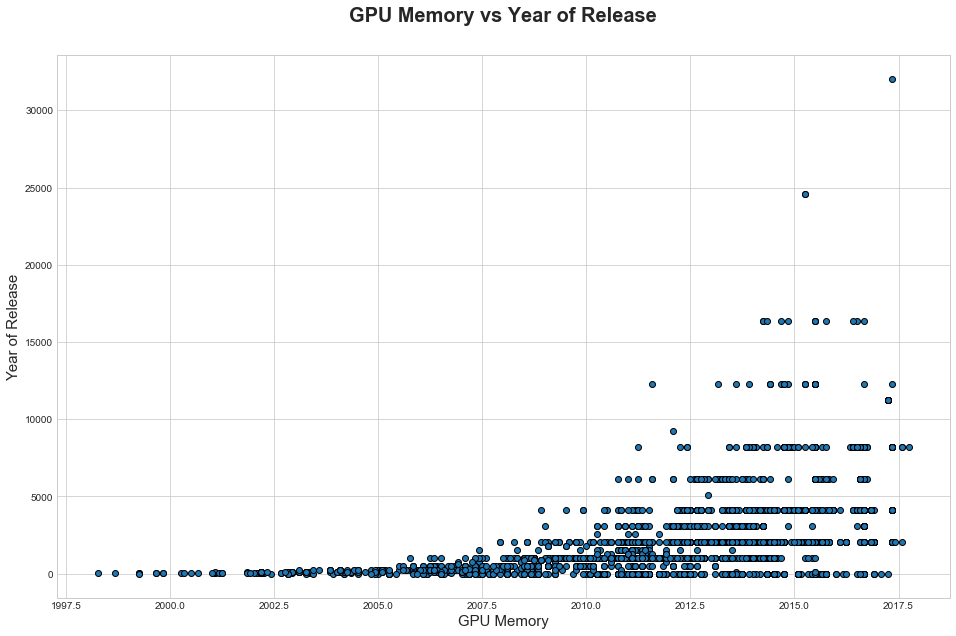

In [13]:
plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
plt.title('GPU Memory vs Year of Release', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('GPU Memory', fontsize=15)
plt.ylabel('Year of Release', fontsize=15)

years = dataset["Release"].values
memory = dataset["Memory"].values

plt.scatter(years, memory, edgecolors='black')
plt.show()

1. Moore's law: https://en.wikipedia.org/wiki/Moore%27s_law
2. "Missingno" GitHub repository: https://github.com/ResidentMario/missingno
3. Polynomial regression theory: https://neutrium.net/mathematics/least-squares-fitting-of-a-polynomial/